In [1]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 88.6 MB/s eta 0:00:00


ARRAY OF hamiltonian parameters:    [ 0.86332707  0.01671081  0.07991447  0.0854049   0.01671081  0.82379638
 -0.07695947  0.03131549  0.07991447 -0.07695947  0.8355417  -0.11345916
  0.0854049   0.03131549 -0.11345916  0.75815689]
[[ 0.86332707  0.01671081  0.07991447  0.0854049 ]
 [ 0.01671081  0.82379638 -0.07695947  0.03131549]
 [ 0.07991447 -0.07695947  0.8355417  -0.11345916]
 [ 0.0854049   0.03131549 -0.11345916  0.75815689]]
[[ 0.86332707  0.01671081  0.07991447  0.0854049 ]
 [ 0.01671081  0.82379638 -0.07695947  0.03131549]
 [ 0.07991447 -0.07695947  0.8355417  -0.11345916]
 [ 0.0854049   0.03131549 -0.11345916  0.75815689]]
ESTE ES EL HAMIILTONIANO DADO
[1.68629718e-01 2.71806998e-01 6.72614097e-01 3.77401797e-01
 9.45486432e-01 5.91174774e-01 2.92381801e-01 6.19368973e-01
 6.77119960e-01 7.38652930e-01 2.53289090e-01 9.26035535e-01
 2.79326411e-01 2.47286122e-01 5.22522347e-01 7.71139698e-01
 4.14999558e-01 9.17683591e-01 4.28843477e-01 8.49627994e-02
 9.99834217e-01 4.35911

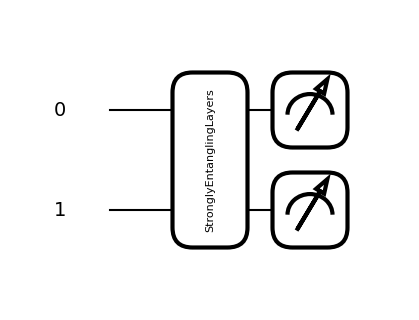

In [2]:
import pennylane as qml
from pennylane import numpy as np
WIRES = 2
LAYERS = 5
NUM_PARAMETERS = LAYERS * WIRES * 3
#params 1 es los parametros dados por el sistema osea los parametros del hamiltoniano
params1=np.array([0.863327072347624,0.0167108057202516,0.07991447085492759,0.0854049026262154,0.0167108057202516,0.8237963773906136,-0.07695947154193797,0.03131548733285282,0.07991447085492759,-0.07695947154193795,0.8355417021014687,-0.11345916130631205,0.08540490262621539,0.03131548733285283,-0.11345916130631205,0.758156886827099])
print("ARRAY OF hamiltonian parameters:   ",params1)
hsquare= np.reshape(params1,(4,4)) #hacemos cuadratico el  hamiltoniano para utilizarlo en el circuito variacional
print(hsquare)
hsq2=np.array(params1,float).reshape((2 ** WIRES), (2 ** WIRES)) #usando el comando dado por el book del desafiro /reshaping quadratic our hamiltonian
print(hsq2)
print("ESTE ES EL HAMIILTONIANO DADO")
paramsopt = np.random.random(30)
print(paramsopt)
print("ESTOS SON LOS PRIMEROS VALORES DE LOS PARAMETROS A OPTIMIZAR // THIS BE THE FIRST SET OF OPTIMIZABLE PARAMETERS")

dev = qml.device("default.qubit", wires = WIRES)
params=paramsopt
hamiltonian=hsq2
@qml.qnode(dev)
def variational_circuit(params,hamiltonian):
    """
    This is a template variational quantum circuit containing a fixed layout of gates with variable
    parameters. To be used as a QNode, it must either be wrapped with the @qml.qnode decorator or
    converted using the qml.QNode function.

    The output of this circuit is the expectation value of a Hamiltonian, somehow encoded in
    the hamiltonian argument

    Args:
        - params (np.ndarray): An array of optimizable parameters of shape (30,)
        - hamiltonian (np.ndarray): An array of real parameters encoding the Hamiltonian
        whose expectation value is returned.

    Returns:
        (float): The expectation value of the Hamiltonian
    """
    parameters = params.reshape((LAYERS, WIRES, 3))
    qml.templates.StronglyEntanglingLayers(parameters, wires=range(WIRES))
    return qml.expval(qml.Hermitian(hsq2, wires = [0,1]))
params=paramsopt
hamiltonian=hsq2
print(qml.draw_mpl(variational_circuit)(paramsopt,hsq2))


In [3]:
variational_circuit(paramsopt,hsq2)

tensor(0.88386272, requires_grad=True)

In [4]:
opt=qml.GradientDescentOptimizer(stepsize=0.2)

In [5]:
for it in range(20):
  (paramsopt,hsq2)=opt.step(variational_circuit,paramsopt,hsq2)
  print("step:  ",it+1,"VARIATIONAL CIRCUIT MINIMIZE :  ",variational_circuit(paramsopt,hsq2),"parametros optimizados// optimized parameter:  ",paramsopt)
print("final value of minimized Qnode:    ",variational_circuit(paramsopt,hsq2))

step:   1 VARIATIONAL CIRCUIT MINIMIZE :   0.8769865487014216 parametros optimizados// optimized parameter:   [ 0.16862972  0.28659666  0.67505678  0.3774018   0.94730013  0.58653788
  0.2877449   0.61644638  0.67712106  0.73775356  0.24307504  0.92828052
  0.28157139  0.23455322  0.52519272  0.77577109  0.42049714  0.92654731
  0.43770719  0.10052903  1.00830664  0.43559141  0.74359364  0.91872474
 -0.00343458  0.44055174  0.92926868  0.52576954  0.9194797   0.54433176]
step:   2 VARIATIONAL CIRCUIT MINIMIZE :   0.8691658015066206 parametros optimizados// optimized parameter:   [ 0.16862972  0.30285185  0.67769591  0.3774018   0.9492819   0.58187801
  0.28308504  0.61305062  0.67731747  0.73713024  0.23262535  0.93096741
  0.28425829  0.22107836  0.52832778  0.78082285  0.42640203  0.93602253
  0.44718241  0.11724486  1.01728482  0.43530626  0.74542829  0.91505559
 -0.00710373  0.43710278  0.92915951  0.52618155  0.92599892  0.55794167]
step:   3 VARIATIONAL CIRCUIT MINIMIZE :   0.860

In [6]:
print("final value of minimized Qnode:    ",variational_circuit(paramsopt,hsq2))

final value of minimized Qnode:     0.6645938068269678
